In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\student_lifestyle_dataset.csv')

# Preview of Dataset

In [3]:
df.head(6)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
5,6,6.0,2.1,8.0,0.3,7.6,2.85,Moderate


In [4]:
print("Shape of data: ", df.shape)

Shape of data:  (2000, 8)


# Descriptive Stats of data

In [5]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


# Null and Duplicate cells and rows cleaning :

In [6]:
print('Null cells: ', df.isnull().sum().sum())
print("Duplicate Rows: ", df.duplicated().sum())

Null cells:  0
Duplicate Rows:  0


- Since there are no missing and duplicate values. The data is good to go for further analysis

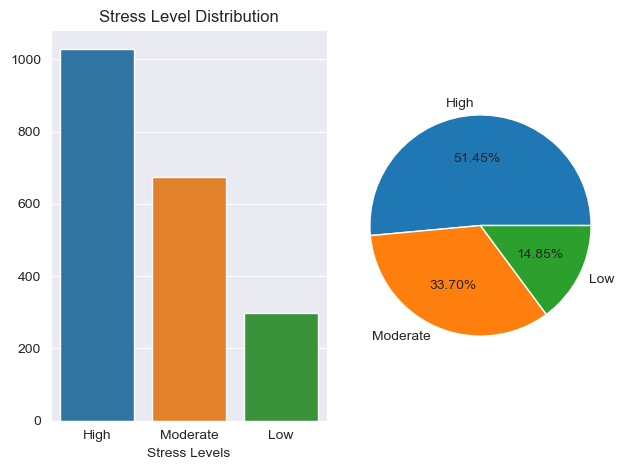

In [7]:
stress = df['Stress_Level'].value_counts()
#plt.figure(figsize=(4,3))
sns.set_style('darkgrid')

plt.subplot(1,2,1)
sns.barplot(x=stress.index, y=stress.values)
plt.xlabel('Stress Levels')
plt.title('Stress Level Distribution')

plt.subplot(1,2,2)
plt.pie(stress, autopct='%.2f%%', labels=stress.index)

plt.tight_layout()
plt.show()

- It is evident that the majority of students are experiencing high levels of stress which is not good.

- Let's See from where this Stress is coming from

# Univariate Analysis (Exploring Single Variables)

In [8]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [9]:
first = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
            'Physical_Activity_Hours_Per_Day', 'GPA']]

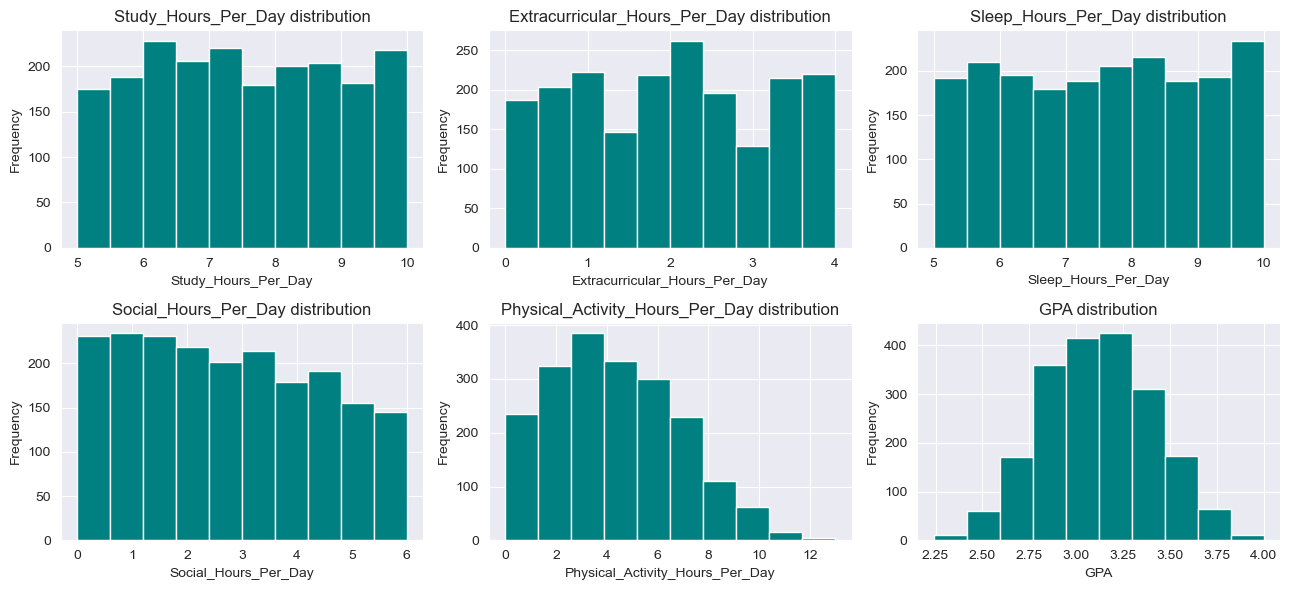

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(13, 6))
axes = axes.flatten()

for i, column in enumerate(first.columns):
    first[column].hist(ax = axes[i], edgecolor='white', color = 'teal')
    
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

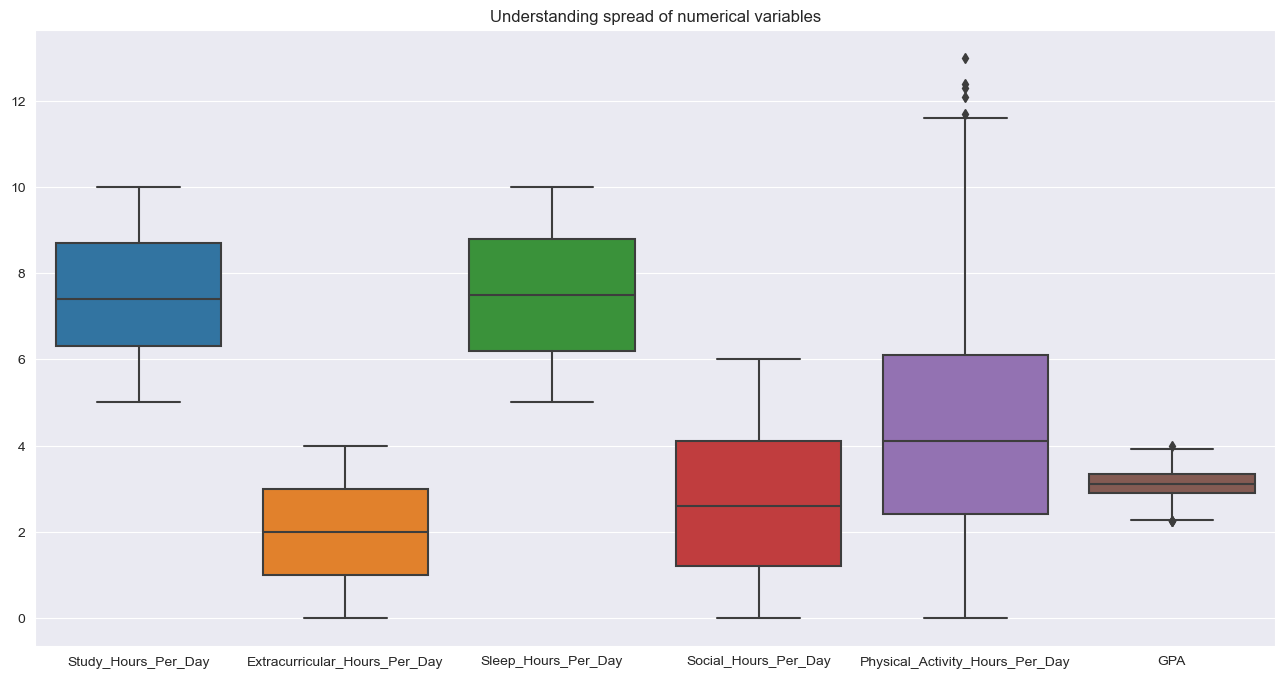

In [11]:
plt.figure(figsize=(16,8))
sns.boxplot(data=first)
plt.title("Understanding spread of numerical variables")

plt.show()

- Outliers are present in Physical Activity hours per day and GPA

# Kurtosis

In [12]:
first.kurt()

Study_Hours_Per_Day               -1.181323
Extracurricular_Hours_Per_Day     -1.182351
Sleep_Hours_Per_Day               -1.212902
Social_Hours_Per_Day              -1.120527
Physical_Activity_Hours_Per_Day   -0.433603
GPA                               -0.370687
dtype: float64

- Lower kurtosis (negative) indicates that the data points are more spread out and less extreme.

# Bivariate Analysis (Exploring Relationships Between Two Variables)

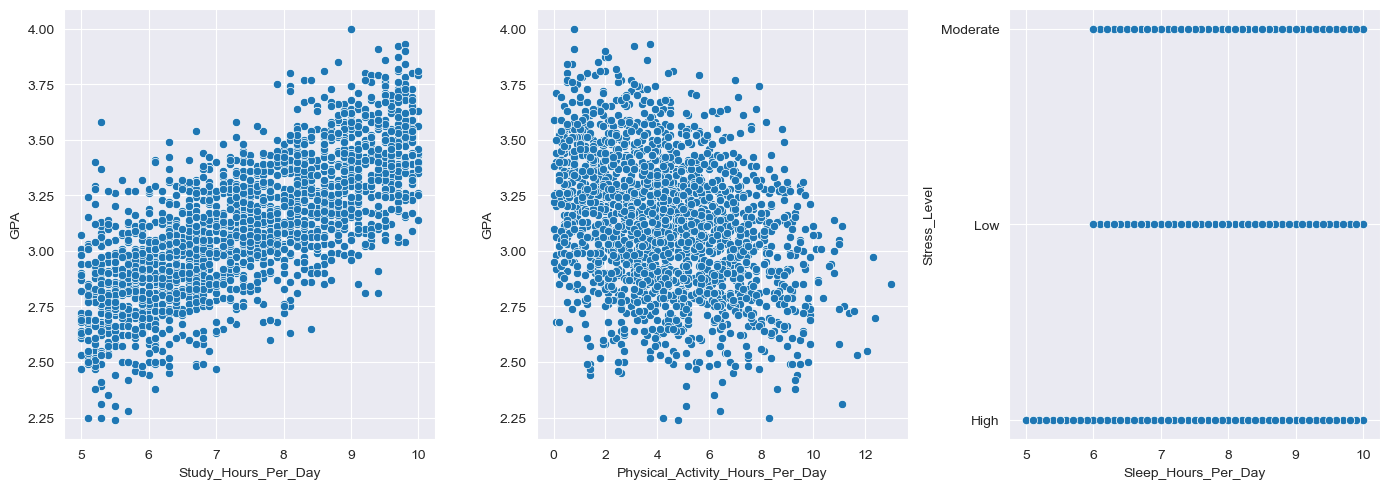

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['Study_Hours_Per_Day'], y=df['GPA'])

plt.subplot(1,3,2)
sns.scatterplot(x=df['Physical_Activity_Hours_Per_Day'], y=df['GPA'])

plt.subplot(1,3,3)
sns.scatterplot(x=df['Sleep_Hours_Per_Day'], y=df['Stress_Level'])


plt.tight_layout()
plt.show()

- According to the first graph, the GPA increases with the number of study hours. 

- The second graph demonstrates a positive link between 0–4 hours of physical activity and successful study outcomes. Additionally, students that play for longer than six hours have very poor GPAs.

- The third graph indicates that getting more than six hours of sleep results in a moderate to low degree of stress. All students who get less than six hours of sleep are under stress. Consequently, 6:30 is the sleeping threshold.

In [15]:
#second = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']]

def indicator(value):
    if value == 'High':
        return 3
    if value == 'Moderate':
        return 2
    if value == 'Low':
        return 1

second['Stress_indicator'] = df['Stress_Level'].map(indicator)
df['Stress_indicator'] =  df['Stress_Level'].map(indicator)
second.drop(columns=['Stress_Level'], inplace=True)

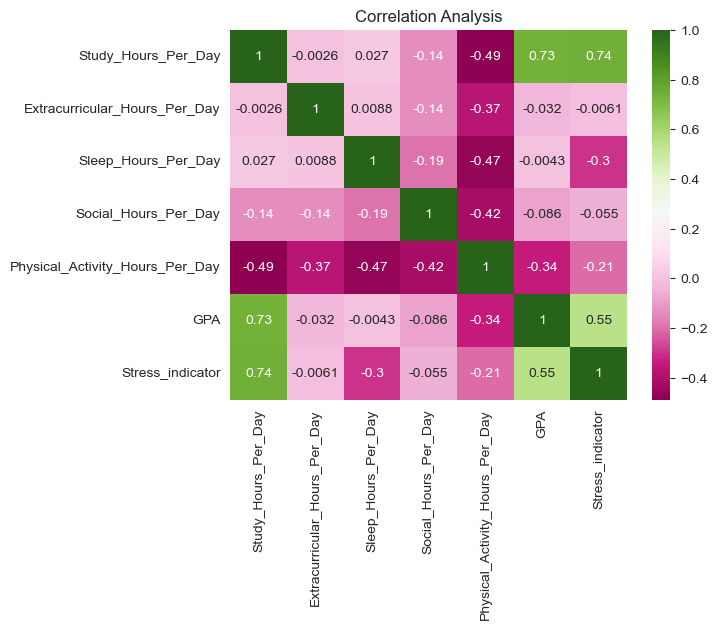

In [16]:
sns.heatmap(second.corr(), annot=True, cmap ='PiYG')
plt.title("Correlation Analysis")
plt.show()

*Insights :*
- According to the heatmap, social and physical activities result in less study time. Study hours and GPA are positively correlated. Study levels rise in tandem with stress levels.

- Physical and social activity are negatively correlated with extracurricular hours. which is good elsewhere. Doing good research is preferable to wasting time on social media.

- Stress and sleep duration are negatively correlated. Consequently, getting more sleep reduces stress.
- Engaging in physical activity is beneficial, but it has a negative relationship with stress. whether or not you play. You're under stress.



# Multivariate Analysis (Exploring Multiple Variables Simultaneously)

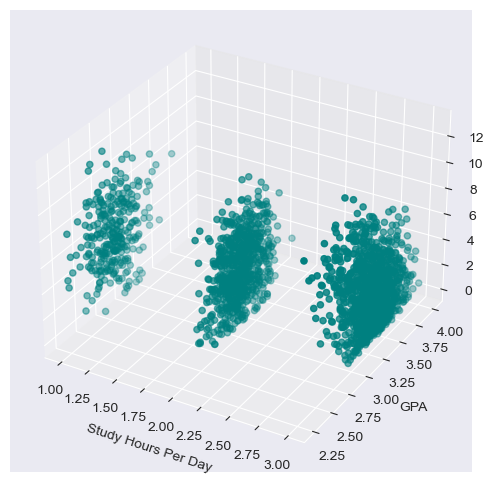

In [17]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.scatter3D(second['Stress_indicator'], second['GPA'], second['Physical_Activity_Hours_Per_Day'], color='teal')

ax.set_xlabel('Study Hours Per Day')
ax.set_ylabel('GPA')
ax.set_zlabel('Sleep Hours Per Day')

plt.show()

# Standard Scaling our independent data

In [18]:
from sklearn.preprocessing import StandardScaler

X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
               'Physical_Activity_Hours_Per_Day', 'GPA']]

y = df['Stress_Level']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [19]:
scaled_features

array([[-0.40448677,  1.56624592,  0.82073377,  0.05654313, -1.00589562,
        -0.42183684],
       [-1.52845139,  1.30663281,  0.34147317,  0.88588186, -0.52847018,
        -1.22559075],
       [-1.66894696,  1.65278363,  1.16306277, -0.89127256,  0.10809708,
        -1.49350872],
       ...,
       [-0.89622129, -1.72218687, -0.89091121, -1.12822648,  2.57479519,
         0.08050935],
       [ 0.4384867 , -1.11642293,  0.06760998,  0.47121249, -0.09083019,
        -0.25438811],
       [ 1.0707168 , -0.25104588, -0.13778742,  0.23425857, -0.56825563,
         1.55405818]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, random_state=42)

# Multiclass Logistic Regression

### When we have more than two categories in target variable (like predicting between 3 classes), we should use multiclass logistic regression

- **Since the target variable is slightly dependent to class 'High' Thus we will use a Multiclass** : One-vs-Rest (OvR) Approach

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=200, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.92      0.87       316
         Low       0.85      0.79      0.82        96
    Moderate       0.80      0.68      0.73       188

    accuracy                           0.82       600
   macro avg       0.83      0.80      0.81       600
weighted avg       0.82      0.82      0.82       600



In [24]:
feature_importance = pd.DataFrame(model.coef_, columns=X.columns)
print("Feature Importance:")
feature_importance

Feature Importance:


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,2.470596,-0.182954,-1.774526,-0.148957,-0.183913,0.199255
1,-4.907082,0.652850,1.655751,0.614232,1.104340,0.160900
2,-0.482946,-0.005831,0.536563,0.019322,-0.048572,-0.210395


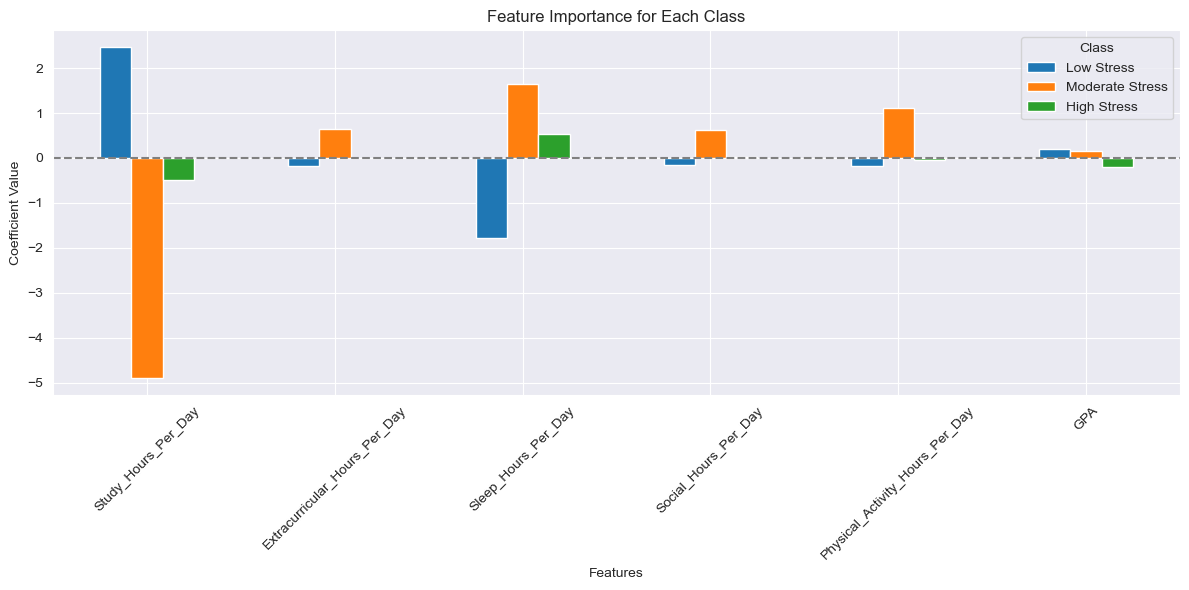

In [27]:
feature_importance_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Low Stress', 'Moderate Stress', 'High Stress'])

feature_importance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance for Each Class')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Overall, the graph suggests that:

1) Increased study hours and less sleep are strongly associated with high stress levels.
2) More extracurricular activities and physical activity might have a slight stress-reducing effect.
3) Social hours and GPA seem to have a less significant impact on stress levels.

# Conclusion

### Here’s a 24-hour schedule based on the key factors:

- **Study Hours Per Day**: 4 hours
- **Extracurricular Hours Per Day**: 2 hours
- **Sleep Hours Per Day**: 8 hours
- **Social Hours Per Day**: 3 hours
- **Physical Activity Hours Per Day**: 1.5 hours

This adds up to a total of 18.5 hours, leaving 5.5 hours that could be used for breaks or personal activities depending on preference.